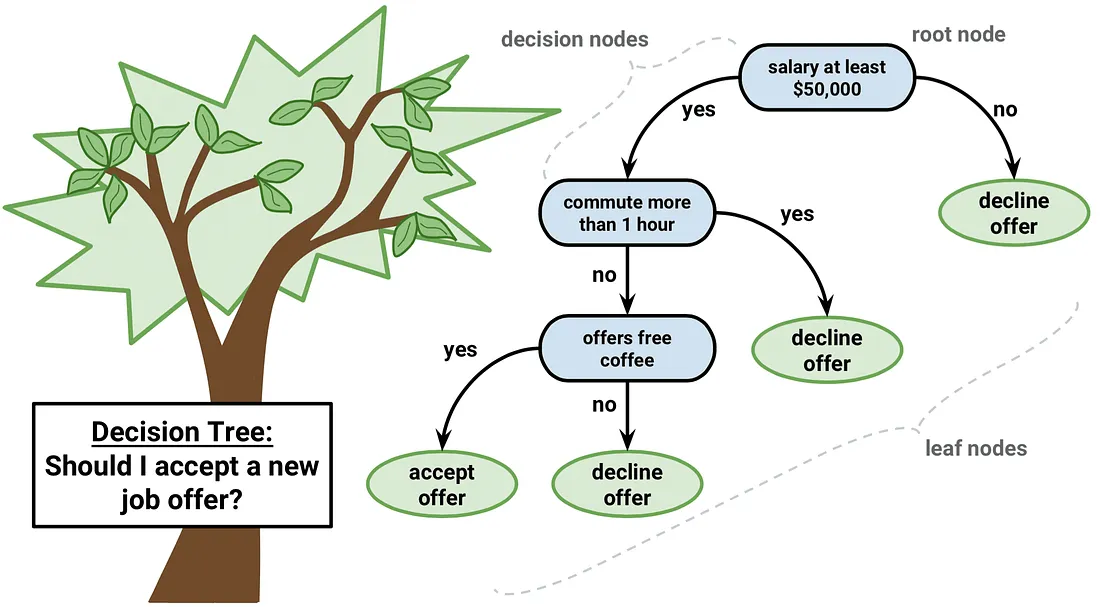

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
iris = load_iris()

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

* iris dataset in sklearn is a iris flower dataset that has three classes in it on the basis of flowers length and width
* Setosa
* Versicolor
* Verginica
* These classes can be classified using sepal length, sepal width, petal length and petal width

* 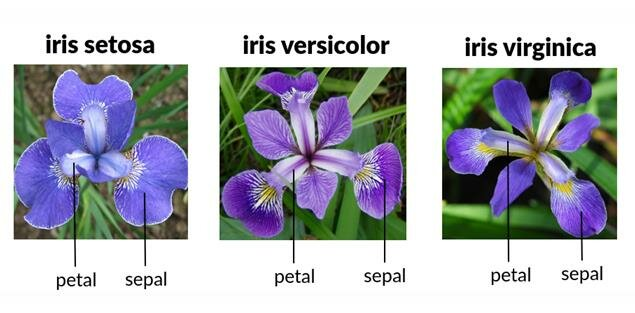

* 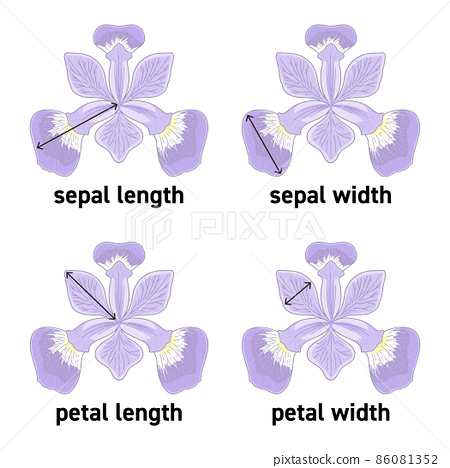

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df = df.rename(columns={"sepal length (cm)":"sep_len", "sepal width (cm)":"sep_wid", 
                   "petal length (cm)":"pet_len", "petal width (cm)":"pet_wid"})

In [12]:
# First 50 records are of Setosa, then 50 records for Versicolor and last 50 
# are of Verginica
setosa = df.iloc[:50]
versicolor = df.iloc[50:100]
verginica = df.iloc[100:]

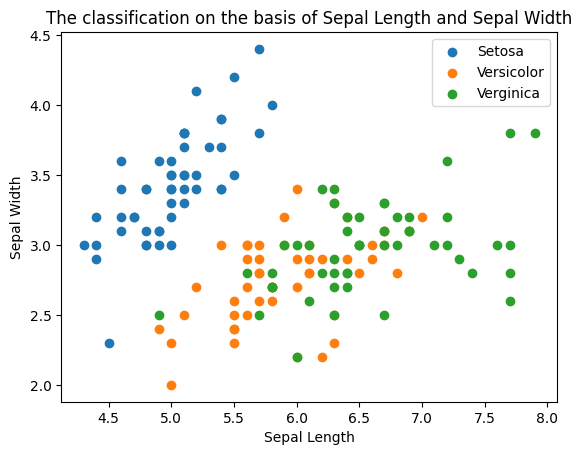

In [13]:
plt.scatter(setosa["sep_len"], setosa["sep_wid"], label="Setosa")
plt.scatter(versicolor["sep_len"], versicolor["sep_wid"], label="Versicolor")
plt.scatter(verginica["sep_len"], verginica["sep_wid"], label="Verginica")
plt.title("The classification on the basis of Sepal Length and Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

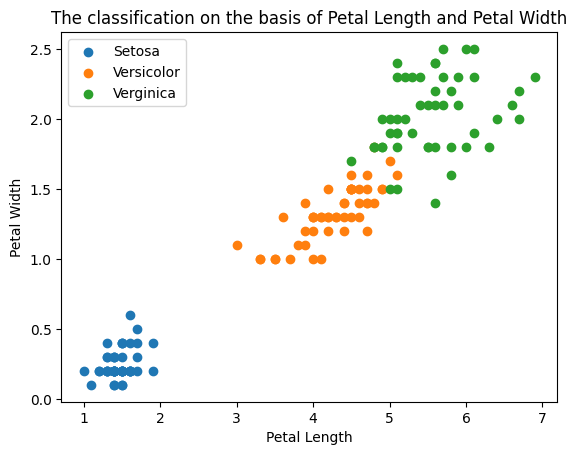

In [14]:
plt.scatter(setosa["pet_len"], setosa["pet_wid"], label="Setosa")
plt.scatter(versicolor["pet_len"], versicolor["pet_wid"], label="Versicolor")
plt.scatter(verginica["pet_len"], verginica["pet_wid"], label="Verginica")
plt.title("The classification on the basis of Petal Length and Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

In [15]:
X = df.drop("target", axis=1)
y = df["target"]

In [16]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=42)

In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(X_tr, y_tr)

DecisionTreeClassifier()

In [19]:
model.score(X_tr, y_tr)

1.0

In [20]:
y_pred = model.predict(X_te)

In [21]:
accuracy_score(y_te, y_pred)

1.0

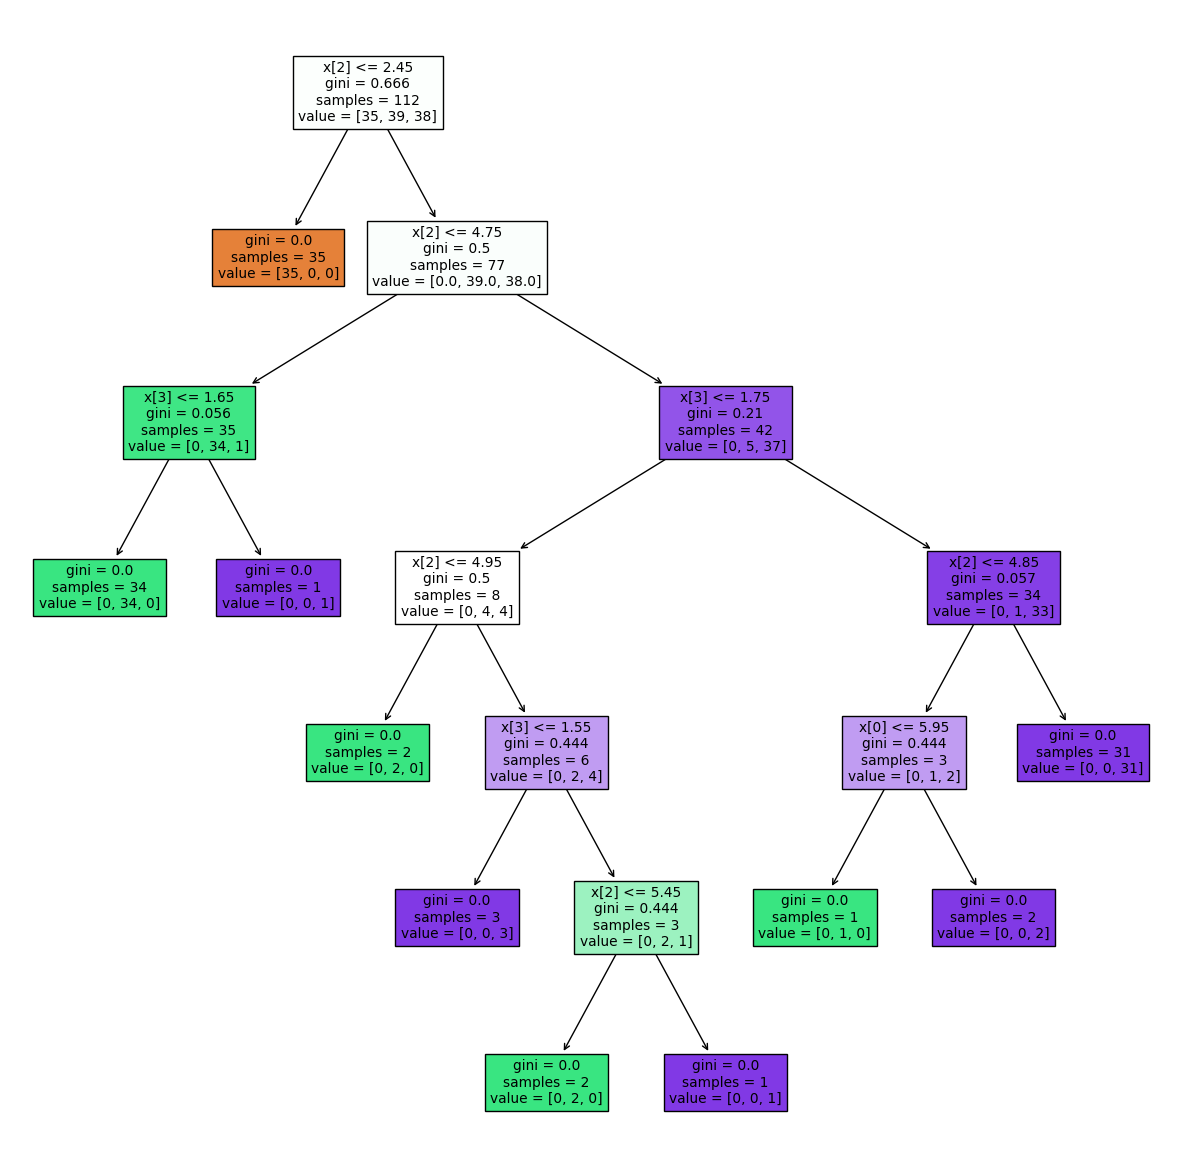

In [25]:
plt.figure(figsize=(15, 15))
tree.plot_tree(model, filled=True)
plt.show()

In [26]:
# Pruning of tree as many of the nodes are showing only single classification per split

In [27]:
dt2 = DecisionTreeClassifier(max_depth=2, max_features=2)

In [28]:
dt2.fit(X_tr, y_tr)

DecisionTreeClassifier(max_depth=2, max_features=2)

In [29]:
dt2.score(X_tr, y_tr)

0.9464285714285714

In [30]:
y_pred2 = dt2.predict(X_te)

In [31]:
accuracy_score(y_te, y_pred2)

0.9736842105263158

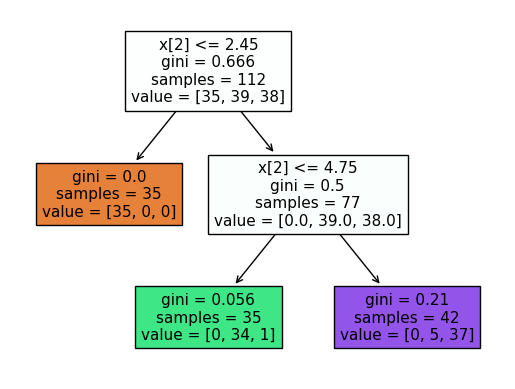

In [32]:
tree.plot_tree(dt2, filled=True)
plt.show()